In [2]:
pip list 

Package        Version
-------------- -------
keras          2.11.0 
python-version 0.0.2  
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(sys.executable)


/home/sukshan/OS/python_venv/bin/python


In [6]:
import numpy as np

In [4]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline

In [10]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_train_df.shape

(60000, 785)

In [13]:
fashion_test_df.shape

(10000, 785)

In [15]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [16]:
training.shape

(60000, 785)

In [17]:
import random

0.0

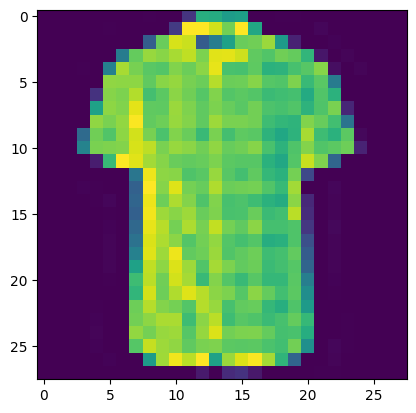

In [18]:
i = random.randint(0, 60001)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,1]
label

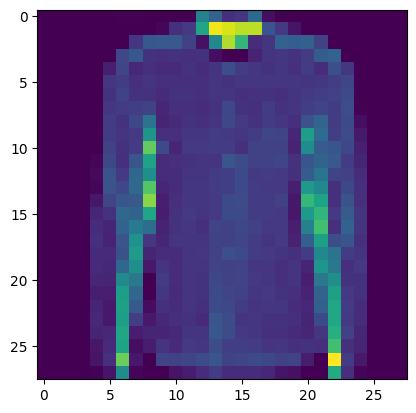

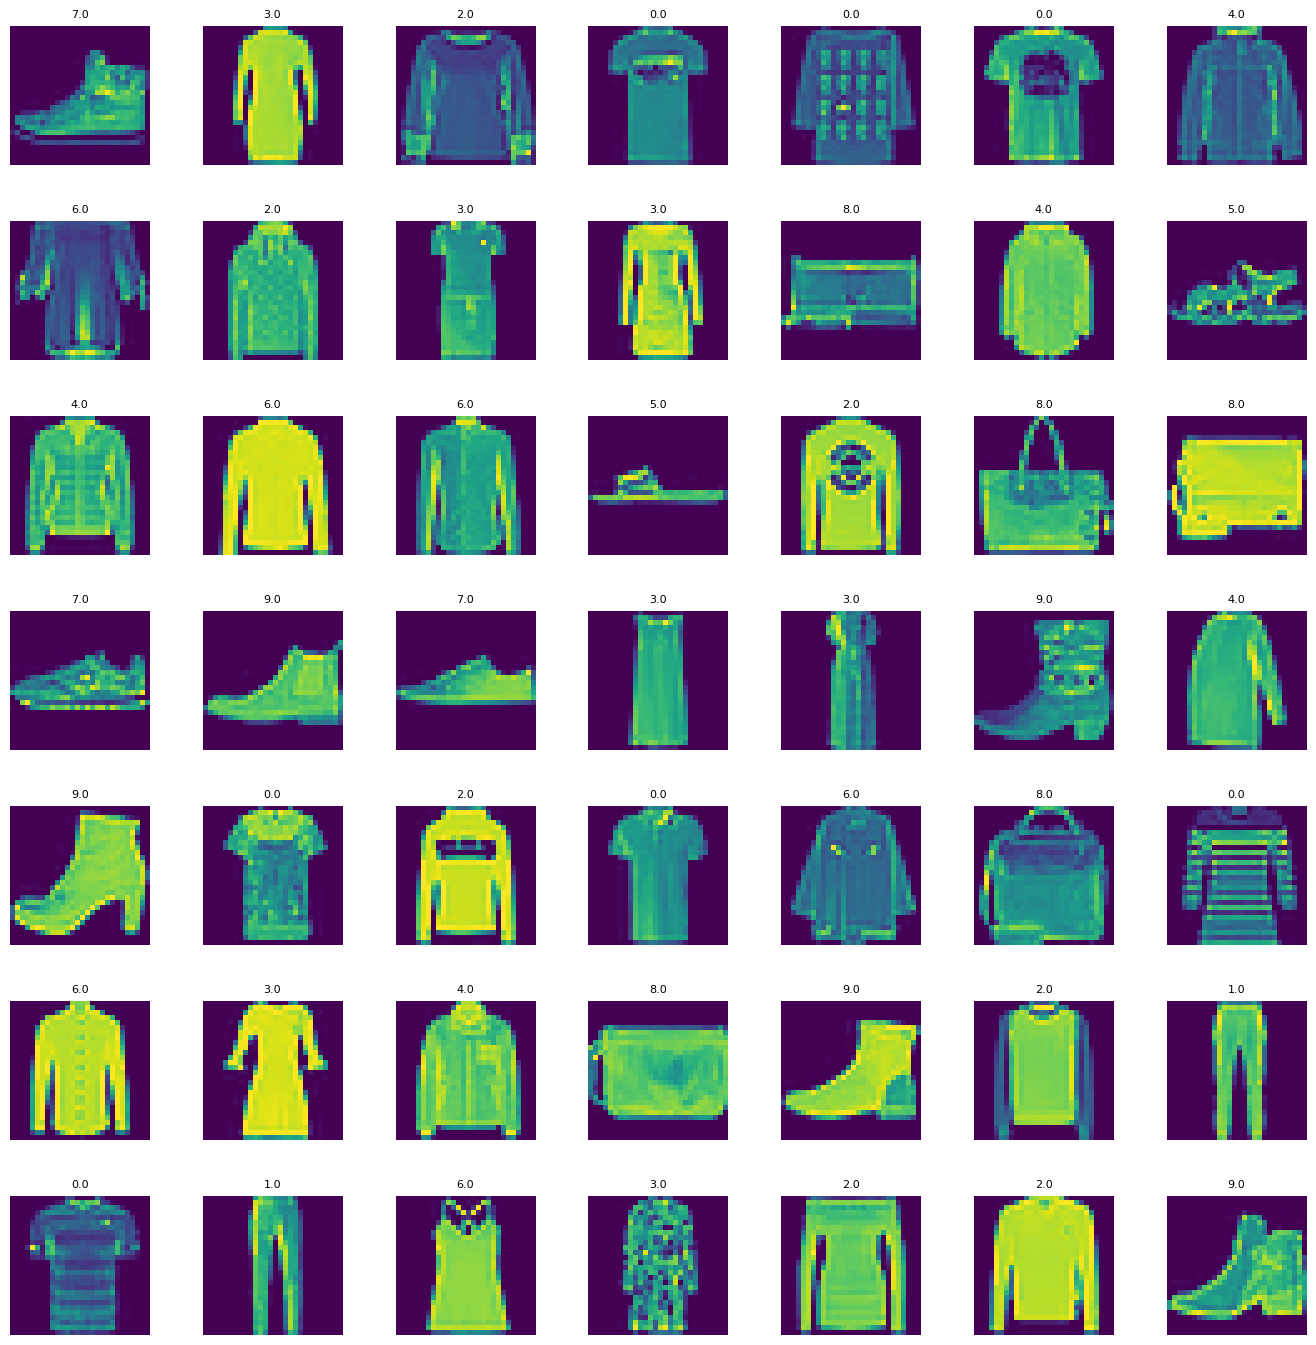

In [19]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1]
label

W_grid = 7
L_grid = 7


fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel()
n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [20]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train ,y_train, test_size = 0.2, random_state = 12345)

In [22]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [23]:
X_train.shape

(48000, 28, 28, 1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
X_validate.shape

(12000, 28, 28, 1)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

2023-05-29 08:52:47.781041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 08:52:47.811331: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 08:52:47.811909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 08:52:48.465215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer= Adam(learning_rate=0.001), metrics= ['accuracy'])

In [29]:
epochs=200

In [30]:
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs, verbose= 1, validation_data= (X_validate, y_validate))

Epoch 1/200


2023-05-29 08:57:08.665935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


94/94 [==============================] - 2s 12ms/step - loss: 1.3993 - accuracy: 0.5989 - val_loss: 0.7616 - val_accuracy: 0.7204
Epoch 2/200
94/94 [==============================] - 2s 21ms/step - loss: 0.6675 - accuracy: 0.7591 - val_loss: 0.6075 - val_accuracy: 0.7818
Epoch 3/200
94/94 [==============================] - 2s 21ms/step - loss: 0.5732 - accuracy: 0.7937 - val_loss: 0.5479 - val_accuracy: 0.8020
Epoch 4/200
94/94 [==============================] - 2s 22ms/step - loss: 0.5273 - accuracy: 0.8095 - val_loss: 0.5115 - val_accuracy: 0.8158
Epoch 5/200
94/94 [==============================] - 2s 21ms/step - loss: 0.5019 - accuracy: 0.8179 - val_loss: 0.4923 - val_accuracy: 0.8246
Epoch 6/200
94/94 [==============================] - 2s 23ms/step - loss: 0.4783 - accuracy: 0.8278 - val_loss: 0.4786 - val_accuracy: 0.8275
Epoch 7/200
94/94 [==============================] - 2s 22ms/step - loss: 0.4631 - accuracy: 0.8316 - val_loss: 0.4614 - val_accuracy: 0.8352
Epoch 8/200
94/94 

94/94 [==============================] - 2s 21ms/step - loss: 0.3070 - accuracy: 0.8885 - val_loss: 0.3559 - val_accuracy: 0.8709
Epoch 59/200
94/94 [==============================] - 2s 20ms/step - loss: 0.3067 - accuracy: 0.8876 - val_loss: 0.3529 - val_accuracy: 0.8722
Epoch 60/200
94/94 [==============================] - 2s 21ms/step - loss: 0.3050 - accuracy: 0.8890 - val_loss: 0.3687 - val_accuracy: 0.8655
Epoch 61/200
94/94 [==============================] - 2s 21ms/step - loss: 0.3038 - accuracy: 0.8887 - val_loss: 0.3492 - val_accuracy: 0.8726
Epoch 62/200
94/94 [==============================] - 2s 21ms/step - loss: 0.3016 - accuracy: 0.8904 - val_loss: 0.3460 - val_accuracy: 0.8741
Epoch 63/200
94/94 [==============================] - 2s 21ms/step - loss: 0.3022 - accuracy: 0.8888 - val_loss: 0.3491 - val_accuracy: 0.8737
Epoch 64/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3019 - accuracy: 0.8895 - val_loss: 0.3544 - val_accuracy: 0.8714
Epoch 65/200

94/94 [==============================] - 2s 20ms/step - loss: 0.2573 - accuracy: 0.9056 - val_loss: 0.3450 - val_accuracy: 0.8752
Epoch 116/200
94/94 [==============================] - 2s 19ms/step - loss: 0.2589 - accuracy: 0.9055 - val_loss: 0.3452 - val_accuracy: 0.8752
Epoch 117/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2547 - accuracy: 0.9066 - val_loss: 0.3457 - val_accuracy: 0.8760
Epoch 118/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2520 - accuracy: 0.9086 - val_loss: 0.3486 - val_accuracy: 0.8768
Epoch 119/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2538 - accuracy: 0.9081 - val_loss: 0.3570 - val_accuracy: 0.8714
Epoch 120/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2566 - accuracy: 0.9057 - val_loss: 0.3481 - val_accuracy: 0.8754
Epoch 121/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2520 - accuracy: 0.9084 - val_loss: 0.3478 - val_accuracy: 0.8761
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2269 - accuracy: 0.9175 - val_loss: 0.3537 - val_accuracy: 0.8767
Epoch 173/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2253 - accuracy: 0.9181 - val_loss: 0.3566 - val_accuracy: 0.8767
Epoch 174/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2254 - accuracy: 0.9179 - val_loss: 0.3564 - val_accuracy: 0.8778
Epoch 175/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2245 - accuracy: 0.9187 - val_loss: 0.3544 - val_accuracy: 0.8774
Epoch 176/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2247 - accuracy: 0.9187 - val_loss: 0.3557 - val_accuracy: 0.8767
Epoch 177/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2231 - accuracy: 0.9181 - val_loss: 0.3609 - val_accuracy: 0.8775
Epoch 178/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2261 - accuracy: 0.9170 - val_loss: 0.3572 - val_accuracy:

In [32]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.3452 - accuracy: 0.8823
Test Accuracy : 0.882


In [33]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 3ms/step


In [34]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [35]:
L=5
W=5

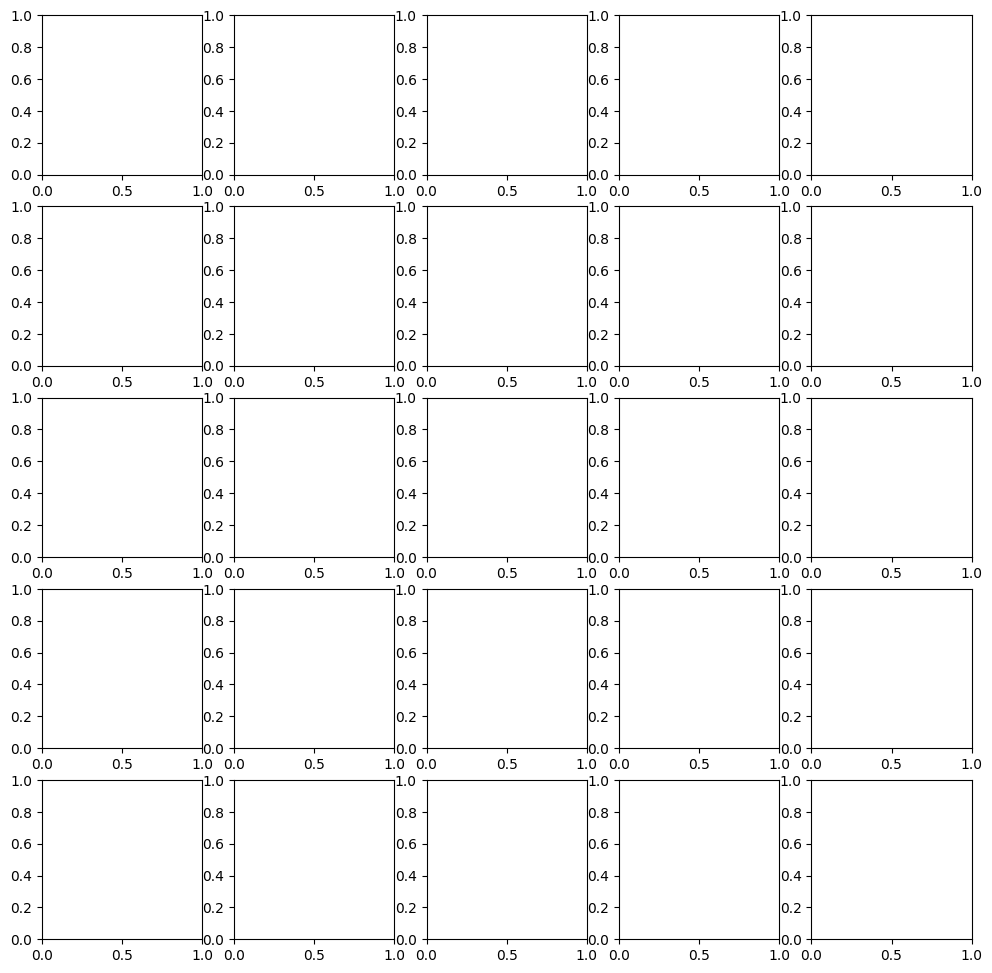

In [36]:
fig, axes = plt.subplots(L, W, figsize = (12, 12))

In [37]:
axes = axes.ravel()

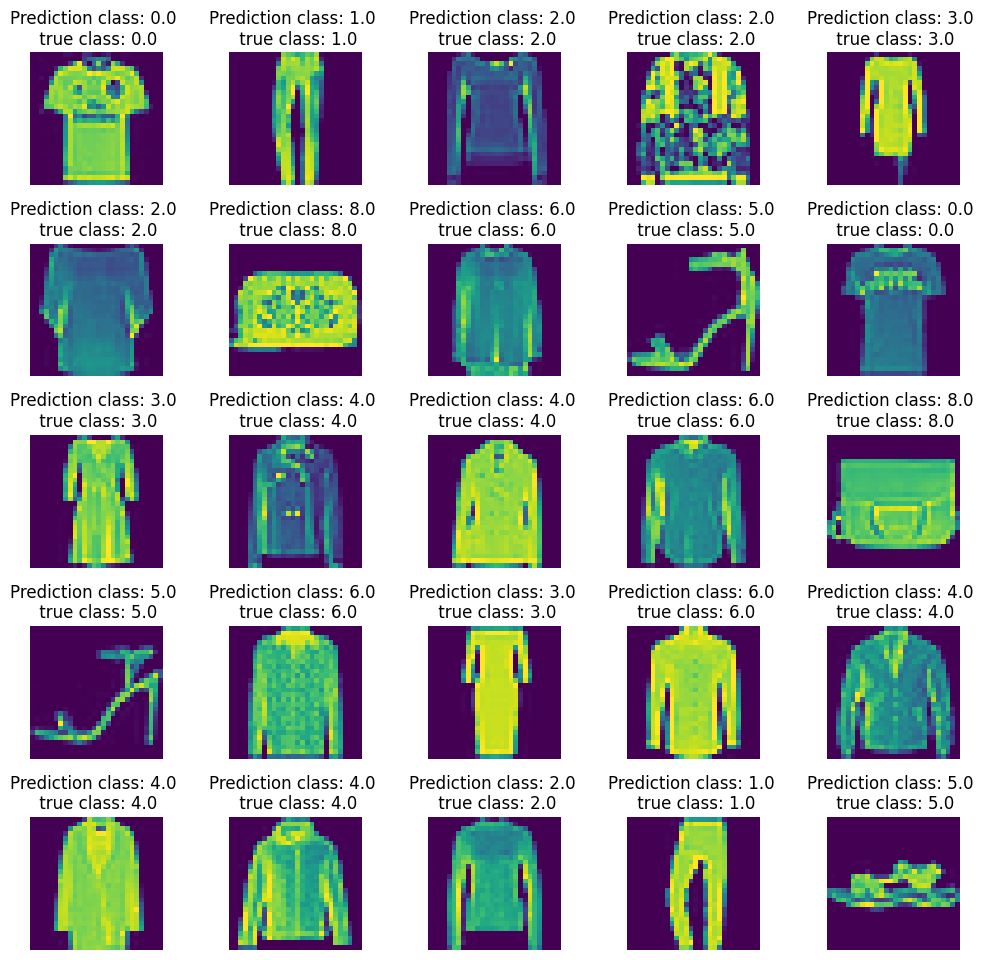

In [41]:
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title('Prediction class: {1} \n true class: {1}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

In [42]:
from sklearn.metrics import classification_report
classes = 10
targets = ["class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     class 0       0.83      0.86      0.85      1000
     class 1       0.97      0.98      0.98      1000
     class 2       0.82      0.80      0.81      1000
     class 3       0.90      0.88      0.89      1000
     class 4       0.80      0.84      0.82      1000
     class 5       0.96      0.95      0.95      1000
     class 6       0.69      0.66      0.68      1000
     class 7       0.93      0.94      0.93      1000
     class 8       0.97      0.96      0.97      1000
     class 9       0.94      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

